In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc, precision_recall_curve, recall_score
from sklearn.dummy import DummyClassifier

from sklearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

import warnings
warnings.filterwarnings("ignore")

Import data into a pandas dataframe, then remove unneeded columns.

In [3]:
df1 = pd.read_csv("ccfraudzip.csv")
df1.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


The data - per Kaggle - is heavily prepped for analysis. Even PCA has already been run. As a result, we'll run SMOTE (see below) in addition to running standard Logistic Regression, to make up for the lack of challenge in preparing and exploring the data. 

In [4]:
df1 = df1.drop('Unnamed: 0', axis=1)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
df1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Split data into features and target and then split into train and test. We are still at this point, heavily imbalanced. We'll run this using Logistic Regression without adjusting anything for the imbalance and then run it using SMOTE. Lastly we'll compare measures of accuracy.

In this case, due to the severe imbalance, 

In [6]:
# split dataset into x,y
x = df1.drop('Class',axis=1)
y = df1['Class']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [9]:
# Instantiate model
logReg1 = LogisticRegression(random_state=42, class_weight=None,solver='lbfgs', max_iter=1000)

# Fit model
logReg1.fit(X_train,y_train)

# Test model
y_pred = logReg1.predict(X_test)

# Evaluate performance
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Confusion Matrix: 
[[85298     9]
 [   51    85]]
Area Under Curve: 0.8124472493464779
Recall score: 0.625


In [12]:
logReg2 = LogisticRegression(random_state=42, class_weight={0.99, 0.01}, solver='lbfgs')
smote_pipe = make_pipeline_imb(SMOTE(random_state=42), logReg2)

smote_model = smote_pipe.fit(X_train, y_train)
smote_predict = smote_model.predict(X_test)

print(f'Confusion Matrix: \n{confusion_matrix(y_test, smote_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, smote_predict)}')
print(f'Recall score: {recall_score(y_test,smote_predict)}')

Confusion Matrix: 
[[83065  2242]
 [   12   124]]
Area Under Curve: 0.9427415790304774
Recall score: 0.9117647058823529


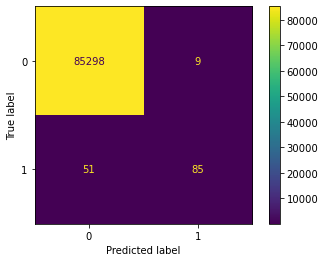

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

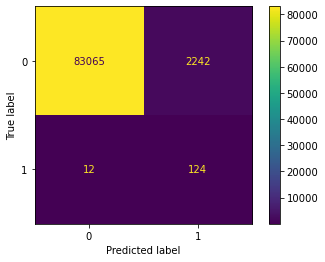

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, smote_predict)
plt.show()

In [15]:
# plot curves
def plot_roc_curve(y_test, dummy_probs, probs):
    # plot naive skill roc curve
    fpr, tpr, _ = roc_curve(y_test, dummy_probs)
    plt.plot(fpr, tpr, linestyle='--', label='Baseline')
    # plot model roc curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Baseline ROC AUC 0.499
Logistic ROC AUC 0.970


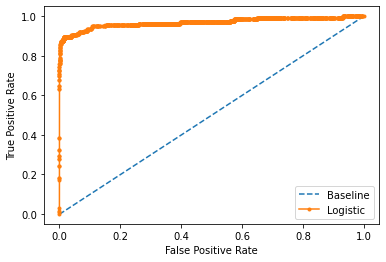

In [16]:
# No discriminative power using a stratified random class predictions
model_dummy = DummyClassifier(strategy='stratified')
model_dummy.fit(X_train, y_train)
yhat_dummy = model_dummy.predict_proba(X_test)
dummy_probs = yhat_dummy[:, 1]

# Calc score for dummy
roc_auc_dummy = roc_auc_score(y_test, dummy_probs)
print('Baseline ROC AUC %.3f' % roc_auc_dummy)

# logReg1 ROC AUC
yhat1 = logReg1.predict_proba(X_test)
probs1 = yhat1[:, 1]

# Calc score for model
roc_auc1 = roc_auc_score(y_test, probs1)
print('Logistic ROC AUC %.3f' % roc_auc1)

# plot roc curves
plot_roc_curve(y_test, dummy_probs, probs1)

Baseline ROC AUC 0.499
Logistic ROC AUC 0.974


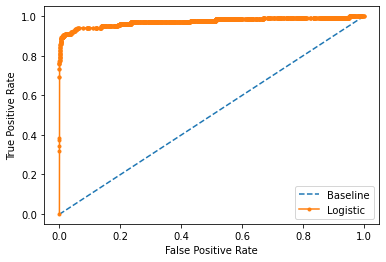

In [17]:
# logReg2 ROC AUC
yhat2 = logReg2.predict_proba(X_test)
probs2 = yhat2[:, 1]

# Calc score for model
roc_auc2 = roc_auc_score(y_test, probs2)
print('Baseline ROC AUC %.3f' % roc_auc_dummy)
print('Logistic ROC AUC %.3f' % roc_auc2)

# plot roc curves
plot_roc_curve(y_test, dummy_probs, probs2)

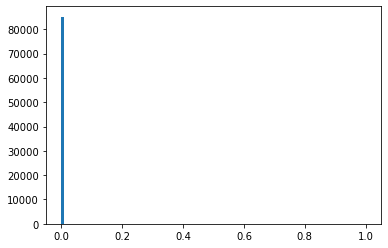

In [18]:
# create a histogram of the predicted probabilities for logReg1
plt.hist(probs1, bins=100)
plt.show()

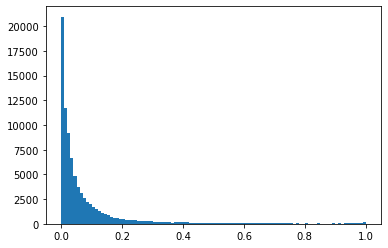

In [19]:
# create a histogram of the predicted probabilities for logReg2
plt.hist(probs2, bins=100)
plt.show()